In [2]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px


In [95]:
reviews_df = pd.read_csv("D:/ML_2022/ML_workspace_2022/NLP/NLP_data/rotten_tomatoes_critic_reviews.csv")
print(reviews_df.shape)
reviews_df.head(5)

(1130017, 8)


,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [4]:
reviews_df.isna().sum()

rotten_tomatoes_link         0
critic_name              18529
top_critic                   0
publisher_name               0
review_type                  0
review_score            305936
review_date                  0
review_content           65806
dtype: int64

In [5]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [6]:
stemmer = PorterStemmer()
lem = WordNetLemmatizer()

word_list = ["historical","finally","suspectful","going","making","developing","goes"]
for word in word_list:
    print("Stemmer:",stemmer.stem(word))
    print("lemmatiser:",lem.lemmatize(word))
    print("--------------------------")

Stemmer: histor
lemmatiser: historical
--------------------------
Stemmer: final
lemmatiser: finally
--------------------------
Stemmer: suspect
lemmatiser: suspectful
--------------------------
Stemmer: go
lemmatiser: going
--------------------------
Stemmer: make
lemmatiser: making
--------------------------
Stemmer: develop
lemmatiser: developing
--------------------------
Stemmer: goe
lemmatiser: go
--------------------------


In [7]:
para ="Reuniting in the present, the Avengers place the Stones into a gauntlet that Stark, Banner, and Rocket had built. Having the most resistance to their radiation, Banner wields the gauntlet and reverses Thanos's disintegrations. Meanwhile, 2014-Nebula, impersonating her future self, uses the time machine to transport 2014-Thanos and his warship to the present, which he then uses to destroy the Avengers Compound. Present-day Nebula convinces 2014-Gamora to betray Thanos, but is unable to convince 2014-Nebula and kills her. Thanos overpowers Stark, Thor, and a Mjolnir-wielding Rogers and summons his army to retrieve the Stones, intent on using them to destroy the universe and create a new one. A restored Stephen Strange arrives with other sorcerers, the restored Avengers and Guardians of the Galaxy, the Ravagers, and the armies of Wakanda and Asgard to fight Thanos's army. Danvers also arrives and destroys Thanos's warship, but Thanos overpowers her and seizes the gauntlet. Stark steals the Stones and uses them to disintegrate Thanos and his army, at the cost of his life."
print(para)

Reuniting in the present, the Avengers place the Stones into a gauntlet that Stark, Banner, and Rocket had built. Having the most resistance to their radiation, Banner wields the gauntlet and reverses Thanos's disintegrations. Meanwhile, 2014-Nebula, impersonating her future self, uses the time machine to transport 2014-Thanos and his warship to the present, which he then uses to destroy the Avengers Compound. Present-day Nebula convinces 2014-Gamora to betray Thanos, but is unable to convince 2014-Nebula and kills her. Thanos overpowers Stark, Thor, and a Mjolnir-wielding Rogers and summons his army to retrieve the Stones, intent on using them to destroy the universe and create a new one. A restored Stephen Strange arrives with other sorcerers, the restored Avengers and Guardians of the Galaxy, the Ravagers, and the armies of Wakanda and Asgard to fight Thanos's army. Danvers also arrives and destroys Thanos's warship, but Thanos overpowers her and seizes the gauntlet. Stark steals th

In [8]:
# tokenisation- sentence tokeniser splits the paragraphs into list of sentences
nltk.download('punkt')
sentences = nltk.sent_tokenize(para)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MAYANK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
sentences

['Reuniting in the present, the Avengers place the Stones into a gauntlet that Stark, Banner, and Rocket had built.',
 "Having the most resistance to their radiation, Banner wields the gauntlet and reverses Thanos's disintegrations.",
 'Meanwhile, 2014-Nebula, impersonating her future self, uses the time machine to transport 2014-Thanos and his warship to the present, which he then uses to destroy the Avengers Compound.',
 'Present-day Nebula convinces 2014-Gamora to betray Thanos, but is unable to convince 2014-Nebula and kills her.',
 'Thanos overpowers Stark, Thor, and a Mjolnir-wielding Rogers and summons his army to retrieve the Stones, intent on using them to destroy the universe and create a new one.',
 "A restored Stephen Strange arrives with other sorcerers, the restored Avengers and Guardians of the Galaxy, the Ravagers, and the armies of Wakanda and Asgard to fight Thanos's army.",
 "Danvers also arrives and destroys Thanos's warship, but Thanos overpowers her and seizes the

In [10]:
def text_clean(sent):
    review = re.sub('[^a-zA-Z]',' ',sent)
    review =review.lower()
    return review


In [11]:
corpus=[]
for sent in sentences:
    cleaned_sent = text_clean(sent)
    print(cleaned_sent)
    print("----------")
    corpus.append(cleaned_sent)

reuniting in the present  the avengers place the stones into a gauntlet that stark  banner  and rocket had built 
----------
having the most resistance to their radiation  banner wields the gauntlet and reverses thanos s disintegrations 
----------
meanwhile       nebula  impersonating her future self  uses the time machine to transport      thanos and his warship to the present  which he then uses to destroy the avengers compound 
----------
present day nebula convinces      gamora to betray thanos  but is unable to convince      nebula and kills her 
----------
thanos overpowers stark  thor  and a mjolnir wielding rogers and summons his army to retrieve the stones  intent on using them to destroy the universe and create a new one 
----------
a restored stephen strange arrives with other sorcerers  the restored avengers and guardians of the galaxy  the ravagers  and the armies of wakanda and asgard to fight thanos s army 
----------
danvers also arrives and destroys thanos s warship  

In [12]:
corpus

['reuniting in the present  the avengers place the stones into a gauntlet that stark  banner  and rocket had built ',
 'having the most resistance to their radiation  banner wields the gauntlet and reverses thanos s disintegrations ',
 'meanwhile       nebula  impersonating her future self  uses the time machine to transport      thanos and his warship to the present  which he then uses to destroy the avengers compound ',
 'present day nebula convinces      gamora to betray thanos  but is unable to convince      nebula and kills her ',
 'thanos overpowers stark  thor  and a mjolnir wielding rogers and summons his army to retrieve the stones  intent on using them to destroy the universe and create a new one ',
 'a restored stephen strange arrives with other sorcerers  the restored avengers and guardians of the galaxy  the ravagers  and the armies of wakanda and asgard to fight thanos s army ',
 'danvers also arrives and destroys thanos s warship  but thanos overpowers her and seizes the

In [13]:
from nltk.tokenize import word_tokenize
# defining stop words
stop_en = set(stopwords.words('english'))


In [14]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

test_corpus = []
def nlp_text_clean_pipeline(text):
    
    text=re.sub('[^a-zA-Z]', " ", str(text))
    text=text.lower()
    
    word_tokens = word_tokenize(text)
    print("words tokensised:\n",word_tokens)
    filtered_words = [w for w in word_tokens if not w in stop_en]
    print("after removing stop_words:\n",filtered_words)

    # lemmatising filtered words
    lem_words = [lem.lemmatize(w) for w in filtered_words]
    print("after lemmatisation:\n",lem_words)


    reformed_clean_text = TreebankWordDetokenizer().detokenize(lem_words)
    print("reformed clean_text:\n",reformed_clean_text)
    test_corpus.append(reformed_clean_text)
    # return text

In [47]:
test_sent='Present-day Nebula convinces 2014-Gamora to betray Thanos, but is unable to convince 2014-Nebula and kills her.'
nlp_text_clean_pipeline(test_sent)

words tokensised:
 ['present', 'day', 'nebula', 'convinces', 'gamora', 'to', 'betray', 'thanos', 'but', 'is', 'unable', 'to', 'convince', 'nebula', 'and', 'kills', 'her']
after removing stop_words:
 ['present', 'day', 'nebula', 'convinces', 'gamora', 'betray', 'thanos', 'unable', 'convince', 'nebula', 'kills']
after lemmatisation:
 ['present', 'day', 'nebula', 'convinces', 'gamora', 'betray', 'thanos', 'unable', 'convince', 'nebula', 'kill']
reformed clean_text:
 present day nebula convinces gamora betray thanos unable convince nebula kill


In [48]:
test_corpus=[]
nlp_text_clean_pipeline(test_sent)

words tokensised:
 ['present', 'day', 'nebula', 'convinces', 'gamora', 'to', 'betray', 'thanos', 'but', 'is', 'unable', 'to', 'convince', 'nebula', 'and', 'kills', 'her']
after removing stop_words:
 ['present', 'day', 'nebula', 'convinces', 'gamora', 'betray', 'thanos', 'unable', 'convince', 'nebula', 'kills']
after lemmatisation:
 ['present', 'day', 'nebula', 'convinces', 'gamora', 'betray', 'thanos', 'unable', 'convince', 'nebula', 'kill']
reformed clean_text:
 present day nebula convinces gamora betray thanos unable convince nebula kill


In [49]:
print(test_corpus)

['present day nebula convinces gamora betray thanos unable convince nebula kill']


Now, that corpus consisting of cleaned text is built, we will build VOCABULARY which is esentially a mapping of each of the unique word and its index in vectorised form

BAG OF WORDS:

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [50]:
X = cv.fit_transform(test_corpus)

In [51]:
# Vacabulary consists of unique words and their index mapping in the vector representation
cv.vocabulary_

{'present': 7,
 'day': 3,
 'nebula': 6,
 'convinces': 2,
 'gamora': 4,
 'betray': 0,
 'thanos': 8,
 'unable': 9,
 'convince': 1,
 'kill': 5}

In [52]:
print("--------Actual corpus ---------------")
print(test_corpus)
print("----------------BOW representation of corpus ---------")
print(X.toarray())

--------Actual corpus ---------------
['present day nebula convinces gamora betray thanos unable convince nebula kill']
----------------BOW representation of corpus ---------
[[1 1 1 1 1 1 2 1 1 1]]


Notice that BOW doesn't give actual binary 1 and 0 vector representation unless flag binary=TRUE is set. So, to get binary vector rep, set the flag TRue during intialisation of CountVectoriser()

cv=CountVectorizer(binary=True)

If you want to include n-grams into Count Vectoriser. use flag ngram_range=(1,3) , 1,3 implies that unigram, bigram, trigrams are included in the vectorisation

In [53]:
cv2 = CountVectorizer(binary=True,ngram_range=(1,3))
X2=cv2.fit_transform(test_corpus)
cv2.vocabulary_

{'present': 20,
 'day': 9,
 'nebula': 16,
 'convinces': 6,
 'gamora': 12,
 'betray': 0,
 'thanos': 23,
 'unable': 26,
 'convince': 3,
 'kill': 15,
 'present day': 21,
 'day nebula': 10,
 'nebula convinces': 17,
 'convinces gamora': 7,
 'gamora betray': 13,
 'betray thanos': 1,
 'thanos unable': 24,
 'unable convince': 27,
 'convince nebula': 4,
 'nebula kill': 19,
 'present day nebula': 22,
 'day nebula convinces': 11,
 'nebula convinces gamora': 18,
 'convinces gamora betray': 8,
 'gamora betray thanos': 14,
 'betray thanos unable': 2,
 'thanos unable convince': 25,
 'unable convince nebula': 28,
 'convince nebula kill': 5}

In [54]:
print("BOW with 1,2,3-grams included")
print(X2.toarray())

BOW with 1,2,3-grams included
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


TF-IDF:

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

tidf = TfidfVectorizer()
X3=tidf.fit_transform(test_corpus)

print(tidf.vocabulary_)


{'present': 7, 'day': 3, 'nebula': 6, 'convinces': 2, 'gamora': 4, 'betray': 0, 'thanos': 8, 'unable': 9, 'convince': 1, 'kill': 5}


In [56]:

print("original corpus:\n",test_corpus)
print("------------BOW--------------------")
print(X.toarray())
print("-------------TF-IDF---------------------")
print(X3.toarray())

original corpus:
 ['present day nebula convinces gamora betray thanos unable convince nebula kill']
------------BOW--------------------
[[1 1 1 1 1 1 2 1 1 1]]
-------------TF-IDF---------------------
[[0.2773501 0.2773501 0.2773501 0.2773501 0.2773501 0.2773501 0.5547002
  0.2773501 0.2773501 0.2773501]]


max_feature flag:

- will include only those 'n' number of features which are in top frequency.
- Using 'max_features', you can control the size of text vector

In [57]:
tidf_1 = TfidfVectorizer(ngram_range=(1,2),max_features=3)
x4=tidf_1.fit_transform(test_corpus)

tidf_1.vocabulary_  # this is showing only 3 features that are most frequent due to max_features flag. Otherwise, it all features with 1,2-grams would have shown up.

{'nebula': 1, 'betray': 0, 'thanos unable': 2}

In [58]:
x4.toarray()

array([[0.40824829, 0.81649658, 0.40824829]])

-------------------------------------------------------------------------     Reviews Dataframe        ----------------------------------------------------------------------------

In [96]:
reviews_df = reviews_df.iloc[:10000,:]

In [97]:
print(reviews_df.shape)
reviews_df.head(5)

(10000, 8)


,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [99]:
reviews_df.isna().sum()

rotten_tomatoes_link       0
critic_name              221
top_critic                 0
publisher_name             0
review_type                0
review_score            2313
review_date                0
review_content           490
dtype: int64

Initial EDA on raw data:

In [100]:
a= "This is a test sent to test the set application on test"
print(a.split())
print("------set---------")
print(list(set(a.split())))

['This', 'is', 'a', 'test', 'sent', 'to', 'test', 'the', 'set', 'application', 'on', 'test']
------set---------
['on', 'set', 'is', 'to', 'This', 'test', 'application', 'sent', 'the', 'a']


In [101]:
def nlp_data_clean(text):
    
    text=re.sub('[^a-zA-Z]', " ", str(text))
    text=text.lower()
    
    word_tokens = word_tokenize(text)
    # print("words tokensised:\n",word_tokens)
    filtered_words = [w for w in word_tokens if not w in stop_en]
    # print("after removing stop_words:\n",filtered_words)

    # lemmatising filtered words
    lem_words = [lem.lemmatize(w) for w in filtered_words]
    # print("after lemmatisation:\n",lem_words)


    reformed_clean_text = TreebankWordDetokenizer().detokenize(lem_words)
    # print("reformed clean_text:\n",reformed_clean_text)
    # test_corpus.append(reformed_clean_text)
    return reformed_clean_text

In [102]:
# raw word count
reviews_df["raw_word_count"]=reviews_df["review_content"].apply(lambda x : len(str(x).split()))

#unique word count
reviews_df["raw_uniq_word_count"]=reviews_df["cleaned_content"].apply(lambda x: len(list(set(str(x).split()))))

# stop words count
reviews_df["stop_wrd_count"]=reviews_df["review_content"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_en]))



In [103]:
reviews_df.head(5)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,raw_word_count,raw_uniq_word_count,stop_wrd_count
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...,29,28,10
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff...",25,22,11
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...,20,19,9
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...,37,34,15
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...,26,25,12


In [104]:
# Data Cleaning
reviews_df["cleaned_content"]=reviews_df["review_content"].apply(lambda x: nlp_data_clean(str(x)))

In [105]:
reviews_df.head(5)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,raw_word_count,raw_uniq_word_count,stop_wrd_count,cleaned_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...,29,28,10,fantasy adventure fuse greek mythology contemp...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff...",25,22,11,uma thurman medusa gorgon coiffure writhing sn...
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...,20,19,9,top notch cast dazzling special effect tide te...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...,37,34,15,whether audience get behind lightning thief ha...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...,26,25,12,really lacking lightning thief genuine sense w...


In [106]:
# raw word count
reviews_df["clean_word_count"]=reviews_df["cleaned_content"].apply(lambda x : len(str(x).split()))

#unique word count
reviews_df["clean_uniq_word_count"]=reviews_df["cleaned_content"].apply(lambda x: len(list(set(str(x).split()))))

# stop words count
reviews_df["clean_stop_wrd_count"]=reviews_df["cleaned_content"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_en]))

reviews_df.head(5)



,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,raw_word_count,raw_uniq_word_count,stop_wrd_count,cleaned_content,clean_word_count,clean_uniq_word_count,clean_stop_wrd_count
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...,29,28,10,fantasy adventure fuse greek mythology contemp...,18,18,0
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff...",25,22,11,uma thurman medusa gorgon coiffure writhing sn...,15,15,0
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...,20,19,9,top notch cast dazzling special effect tide te...,12,12,0
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...,37,34,15,whether audience get behind lightning thief ha...,20,20,0
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...,26,25,12,really lacking lightning thief genuine sense w...,12,12,0


In [107]:
!pip install wordcloud

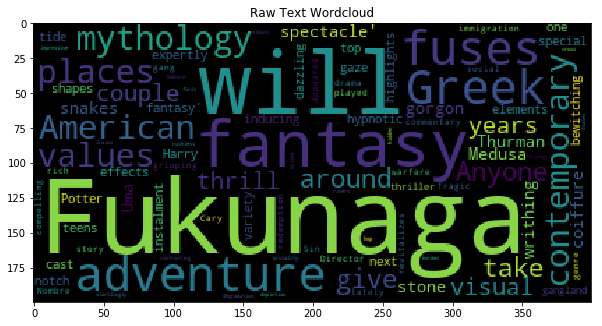

In [117]:
# WordCloud
from wordcloud import WordCloud
from matplotlib import pyplot as plt

raw_text = reviews_df["review_content"].values

wc_raw = WordCloud().generate(str(raw_text))
plt.figure(figsize=(10,10))
plt.title("Raw Text Wordcloud")

plt.imshow(wc_raw)
plt.show()


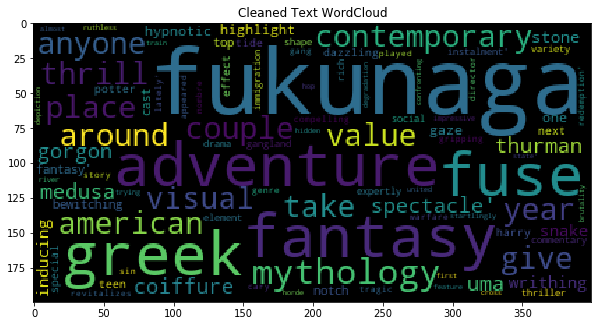

In [118]:
clean_text = reviews_df["cleaned_content"].values
wc = WordCloud().generate(str(clean_text))
plt.figure(figsize=(10,10))
plt.title("Cleaned Text WordCloud")
plt.imshow(wc)
plt.show()

In [27]:

for text in sentences:
    nlp_text_clean_pipeline(text)
    print("-----------")


words tokensised:
 ['reuniting', 'in', 'the', 'present', 'the', 'avengers', 'place', 'the', 'stones', 'into', 'a', 'gauntlet', 'that', 'stark', 'banner', 'and', 'rocket', 'had', 'built']
after removing stop_words:
 ['reuniting', 'present', 'avengers', 'place', 'stones', 'gauntlet', 'stark', 'banner', 'rocket', 'built']
after lemmatisation:
 ['reuniting', 'present', 'avenger', 'place', 'stone', 'gauntlet', 'stark', 'banner', 'rocket', 'built']
reformed clean_text:
 reuniting present avenger place stone gauntlet stark banner rocket built
-----------
words tokensised:
 ['having', 'the', 'most', 'resistance', 'to', 'their', 'radiation', 'banner', 'wields', 'the', 'gauntlet', 'and', 'reverses', 'thanos', 's', 'disintegrations']
after removing stop_words:
 ['resistance', 'radiation', 'banner', 'wields', 'gauntlet', 'reverses', 'thanos', 'disintegrations']
after lemmatisation:
 ['resistance', 'radiation', 'banner', 'wields', 'gauntlet', 'revers', 'thanos', 'disintegration']
reformed clean_tex